In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import os
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
#from keras.applications import ResNet50, Xception, InceptionResNetV2
from tensorflow.keras import layers
from keras.layers.normalization import BatchNormalization
import keras
import dlib
import keras
from keras.models import Model
from keras.layers import Dense, Dropout, Activation, Flatten, Input
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.merge import add
from keras import regularizers
import cv2
from sklearn import preprocessing
from imutils import face_utils
import numpy as np
from keras.optimizers import SGD,Adam
from keras.layers import UpSampling2D
from tensorflow.keras import Model

from tensorflow.keras.utils import to_categorical

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D
from keras.layers import Dense, Activation, Dropout, Flatten

from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from PIL import Image
from numpy.random import seed
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [ ]:
import matplotlib.pyplot as plt             

def plot_accuracy_loss(history):
    fig = plt.figure(figsize=(10,5))
    plt.subplot(221)
    plt.plot(history.history['accuracy'], label = "acc")
    plt.plot(history.history['val_accuracy'], label = "val_acc")
    plt.title("train_acc vs val_acc")
    plt.ylabel("accuracy")
    plt.xlabel("epochs")
    plt.legend()
    plt.subplot(222)
    plt.plot(history.history['loss'] ,label = "loss")
    plt.plot(history.history['val_loss'], label = "val_loss")
    plt.title("train_loss vs val_loss")
    plt.ylabel("loss")
    plt.xlabel("epochs")

    plt.legend()
    plt.show()

In [ ]:
X_train = np.load('/content/drive/MyDrive/DATASETS/X_train_KDEF_48_hog.npy')
y_train = np.load('/content/drive/MyDrive/DATASETS/y_train_KDEF_48_hog.npy')
X_test = np.load('/content/drive/MyDrive/DATASETS/X_test_KDEF_48_hog.npy')
y_test = np.load('/content/drive/MyDrive/DATASETS/y_test_KDEF_48_hog.npy')

In [ ]:
x_train_data = X_train

print(x_train_data.shape)
x_train_data=x_train_data.reshape(-1,48,48,1)
print(x_train_data.shape)
y_train_data = to_categorical(y_train, 7)
print(y_train_data.shape)
x_test_data = X_test
print(x_test_data.shape)
x_test_data=x_test_data.reshape(-1,48,48,1)
print(x_test_data.shape)
y_test_data = to_categorical(y_test, 7)
print(y_test_data.shape)

(1213, 48, 48)
(1213, 48, 48, 1)
(1213, 7)
(1210, 48, 48)
(1210, 48, 48, 1)
(1210, 7)


In [ ]:
x_train_data[0].shape


(48, 48, 1)

In [ ]:
from sklearn.model_selection import train_test_split
x_train_final, x_valid_final, y_train_final, y_valid_final = train_test_split(x_train_data, y_train_data, test_size=0.1, random_state=42,shuffle=True)

In [ ]:

# define the model
model = Sequential()

model.add(Conv2D(32, kernel_size=(2, 2), activation='relu', input_shape=(48,48,1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, kernel_size=(2, 2), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, kernel_size=(2, 2), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.2))



model.add(Dense(7, activation='softmax'))

In [ ]:

#sgd = SGD(lr=0.0001, decay=1e-6, momentum=0.9, nesterov=True)
#model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
#callbacks = [ModelCheckpoint(weights, monitor='val_loss', save_best_only=True, verbose=0)]
adam=Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, amsgrad=False)
model.compile(loss='binary_crossentropy',optimizer = Adam(lr = 1e-4), metrics=['accuracy'])
checkpoint_filepath = '/content/drive/MyDrive/DATASETS/test_hog_test.h5'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    monitor='val_accuracy',
    mode='max',
    verbose=1,

    save_best_only=True)
#model.fit(x_train_data,y_train_data,batch_size = 64,epochs=100)
history= model.fit(x_train_final , y_train_final, batch_size=32,epochs=1200,validation_data=(x_valid_final, y_valid_final), callbacks=[model_checkpoint_callback])

#model.fit(X_train, Y_train, batch_size = 1000, nb_epoch = 5, verbose = 1, shuffle = True)


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/1200
35/35 [==============================] - 44s 26ms/step - loss: 0.6594 - accuracy: 0.1380 - val_loss: 0.4702 - val_accuracy: 0.0738

Epoch 00001: val_accuracy improved from -inf to 0.07377, saving model to /content/drive/MyDrive/DATASETS/test_hog_test.h5
Epoch 2/1200
35/35 [==============================] - 0s 6ms/step - loss: 0.4196 - accuracy: 0.1320 - val_loss: 0.4364 - val_accuracy: 0.0984

Epoch 00002: val_accuracy improved from 0.07377 to 0.09836, saving model to /content/drive/MyDrive/DATASETS/test_hog_test.h5
Epoch 3/1200
35/35 [==============================] - 0s 7ms/step - loss: 0.4119 - accuracy: 0.1438 - val_loss: 0.4299 - val_accuracy: 0.0738

Epoch 00003: val_accuracy did not improve from 0.09836
Epoch 4/1200
35/35 [==============================] - 0s 7ms/step - loss: 0.4114 - accuracy: 0.1391 - val_loss: 0.4288 - val_accuracy: 0.0738

Epoch 00004: val_accuracy did not improve from 0.09836
Epoch 5/1200
35/35 [==============================] - 0s 7ms/step - l

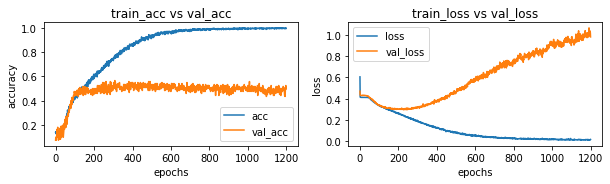

In [ ]:
plot_accuracy_loss(history)


In [ ]:
from sklearn.metrics import classification_report
from keras.models import Sequential, load_model

best_model=load_model('/content/drive/MyDrive/DATASETS/test_hog.h5')

predicted = model.predict(x_test_data)
predicted_best = best_model.predict(x_test_data)
pred_labels = np.argmax(predicted, axis = 1)
pred_labels_best = np.argmax(predicted_best, axis = 1)
report = classification_report(y_test, pred_labels)
print(report)
print("--------------------------------------------------------------------------------")
report_best = classification_report(y_test, pred_labels_best)
print(report_best)

              precision    recall  f1-score   support

           0       0.32      0.31      0.32       175
           1       0.42      0.56      0.48       169
           2       0.43      0.65      0.51       170
           3       0.58      0.77      0.66       172
           4       0.47      0.26      0.34       175
           5       0.34      0.28      0.31       175
           6       0.60      0.29      0.39       174

    accuracy                           0.44      1210
   macro avg       0.45      0.45      0.43      1210
weighted avg       0.45      0.44      0.43      1210

--------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.25      0.29      0.27       175
           1       0.39      0.60      0.48       169
           2       0.38      0.56      0.46       170
           3       0.68      0.64      0.66       172
           4       0.38      0.21      0.27       1